# Importation

In [265]:
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore")
import sys
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Defining Dataframe

In [13]:
# List of column names
column_names = ['metric(s)', 'URL', 'Title','Trainer','rate','evaluation nbr','level','duration','aquired competences']

# Create an empty DataFrame with column names
Main = pd.DataFrame(columns=column_names)

In [14]:
skills_list = ["Leadership", "Creativity", "Teamwork", "Communication", "Trust", "Respect", "Performance"]

In [15]:
import itertools
# Generate combinations of couples for each skill
skill_combinations = []
for i in range(len(skills_list)):
    for j in range(i+1, len(skills_list)):
        skill_combinations.append(f"{skills_list[i]}+{skills_list[j]}")

skills_list.extend(skill_combinations)

In [16]:
skills_list

['Leadership',
 'Creativity',
 'Teamwork',
 'Communication',
 'Trust',
 'Respect',
 'Performance',
 'Leadership+Creativity',
 'Leadership+Teamwork',
 'Leadership+Communication',
 'Leadership+Trust',
 'Leadership+Respect',
 'Leadership+Performance',
 'Creativity+Teamwork',
 'Creativity+Communication',
 'Creativity+Trust',
 'Creativity+Respect',
 'Creativity+Performance',
 'Teamwork+Communication',
 'Teamwork+Trust',
 'Teamwork+Respect',
 'Teamwork+Performance',
 'Communication+Trust',
 'Communication+Respect',
 'Communication+Performance',
 'Trust+Respect',
 'Trust+Performance',
 'Respect+Performance']

# 

# 

# Coursera:

# 

In [ ]:
# Your existing code here...

#this to collect more data 
for b in range(20):
    # Modify the loop to extract data and append it to the DataFrame
    for j in tqdm(skills_list):
        print("_________________"+j+"_____________")
        CourseURL=[]
        for k in range(1, 11):
            course_url = "https://www.coursera.org/search?query=" + j + "&page=" + str(k) + "&=null"
            response = requests.get(course_url)
            soup = BeautifulSoup(response.content, "html.parser")
            ul_element = soup.find("ul", class_="cds-9 css-18msmec cds-10")
            div_elements = ul_element.find_all("div", class_="css-1ek61wr")
            ally = ul_element.find_all("div", class_="product-reviews css-pn23ng")

            # Use zip() to iterate over both div_elements and ally lists together
            for element, review_element in zip(div_elements, ally):
                href = element.a.get("href")
                school = element.find("span", class_="cds-119 css-1mru19s cds-121").get_text()
                title = element.find("h2", class_="cds-119 css-h1jogs cds-121").get_text()
                reviews = review_element.find('p', class_='cds-119 css-dmxkm1 cds-121').get_text()
                rating = review_element.find('p', class_='cds-119 css-11uuo4b cds-121').get_text()
                level =  ' '.join(element.a.get("aria-label").split()[-6:-3])
                duration = ' '.join(element.a.get("aria-label").split()[-4:])
                competence= element.find("p", class_="cds-119 css-12ksubz cds-121").get_text().replace("Skills you'll gain: ", "").split(', ') if element.find("p", class_="cds-119 css-12ksubz cds-121") else ""
                # Assuming you have other metrics, level, duration, etc., you can extract them similarly
                # Append the data to the DataFrame
                Main = Main.append({
                    'metric(s)': j,
                    'URL': "https://www.coursera.org" + href,
                    'Title': title,
                    'Trainer': school,
                    'rate': rating,
                    'evaluation nbr': reviews,
                    # Add other data for level, duration, etc.
                    'level': level,
                    'duration': duration,
                    'aquired competences': competence
                }, ignore_index=True)

In [32]:
Main

metric(s)                                                URL  \
0              Performance  https://www.coursera.org/projects/create-perfo...   
1              Performance  https://www.coursera.org/learn/quantitative-fo...   
2              Performance  https://www.coursera.org/projects/baking-light...   
3              Performance  https://www.coursera.org/projects/googlecloud-...   
4              Performance  https://www.coursera.org/learn/app-deployment-...   
...                    ...                                                ...   
3582  Teamwork+Performance            https://www.coursera.org/learn/feedback   
3583  Teamwork+Performance  https://www.coursera.org/learn/high-performing...   
3584  Teamwork+Performance  https://www.coursera.org/learn/leading-teams-b...   
3585  Teamwork+Performance  https://www.coursera.org/learn/cloud-computing...   
3586  Teamwork+Performance  https://www.coursera.org/learn/management-skil...   

                                                  Title  \
0           Create a Performance Summary using SnapEval   
1     Quantitative Formal Modeling and Worst-Case Pe...   
2         Baking Lights for Better Performance in Unity   
3              Optimizing Performance of LookML Queries   
4     App Deployment, Debugging, and Performance en ...   
...                                                 ...   
3582                            Giving Helpful Feedback   
3583                     Building High-Performing Teams   
3584    Leading Teams: Building Effective Team Cultures   
3585                        Cloud Computing Foundations   
3586       Management Skills for International Business   

                                         Trainer rate   evaluation nbr  \
0                       Coursera Project Network  4.4     (42 reviews)   
1                                   EIT Digital   4.7  (23.7k reviews)   
2                       Coursera Project Network  4.5  (15.4k reviews)   
3                                   Google Cloud  4.8  (16.3k reviews)   
4                                   Google Cloud  4.5  (10.4k reviews)   
...                                          ...  ...              ...   
3582              University of Colorado Boulder  4.8   (1.3k reviews)   
3583                  University of Pennsylvania  4.8    (302 reviews)   
3584  University of Illinois at Urbana-Champaign  4.8   (2.2k reviews)   
3585                             Duke University  4.6    (201 reviews)   
3586                        University of London  4.7    (649 reviews)   

                        level           duration  \
0     Intermediate level Less  Less Than 2 Hours   
1               Mixed level 1       1 - 3 Months   
2         Beginner level Less  Less Than 2 Hours   
3     Intermediate level Less  Less Than 2 Hours   
4        Intermediate level 1        1 - 4 Weeks   
...                       ...                ...   
3582            Mixed level 1       1 - 3 Months   
3583         Beginner level 1       1 - 3 Months   
3584     Intermediate level 1       1 - 3 Months   
3585         Beginner level 1       1 - 3 Months   
3586            Mixed level 1        1 - 4 Weeks   

                                    aquired competences  
0                                                        
1                                                        
2                             [Application Development]  
3                [Data Analysis, Google Cloud Platform]  
4                                                        
...                                                 ...  
3582  [Business Psychology, Entrepreneurship, Human ...  
3583  [Collaboration, Communication, Emotional Intel...  
3584  [Adaptability, Business Psychology, Communicat...  
3585  [Cloud Computing, DevOps, Continuous Delivery,...  
3586  [Business Psychology, Entrepreneurship, Human ...  

[3587 rows x 9 columns]

# manual number page:

In [ ]:
# Your existing code here...

#this to collect more data 
# Modify the loop to extract data and append it to the DataFrame
for j in tqdm(skills_list):
    print("_________________"+j+"_____________")
    CourseURL=[]
    course_url = "https://www.coursera.org/search?query=" + j + "&page=1&=null"
    print(course_url)
    response = requests.get(course_url)
    soup = BeautifulSoup(response.content, "html.parser")
    ul_element = soup.find("ul", class_="cds-9 css-18msmec cds-10")
    div_elements = ul_element.find_all("div", class_="css-1cj5od")
    ally = ul_element.find_all("div", class_="product-reviews css-pn23ng")

    # Use zip() to iterate over both div_elements and ally lists together
    for element, review_element in zip(div_elements, ally):
        href = element.a.get("href")
        school = element.find("span", class_="cds-119 css-1mru19s cds-121").get_text()
        title = element.find("h2", class_="cds-119 css-h1jogs cds-121").get_text()
        reviews = review_element.find('p', class_='cds-119 css-dmxkm1 cds-121').get_text()
        rating = review_element.find('p', class_='cds-119 css-11uuo4b cds-121').get_text()
        level =  ' '.join(element.a.get("aria-label").split()[-6:-3])
        duration = ' '.join(element.a.get("aria-label").split()[-4:])
        print(duration)
        competence= element.find("p", class_="cds-119 css-12ksubz cds-121").get_text().replace("Skills you'll gain: ", "").split(', ') if element.find("p", class_="cds-119 css-12ksubz cds-121") else ""
        # Assuming you have other metrics, level, duration, etc., you can extract them similarly
        # Append the data to the DataFrame
        Main = Main.append({
            'metric(s)': j,
            'URL': "https://www.coursera.org" + href,
            'Title': title,
            'Trainer': school,
            'rate': rating,
            'evaluation nbr': reviews,
            # Add other data for level, duration, etc.
            'level': level,
            'duration': duration,
            'aquired competences': competence
        }, ignore_index=True)


In [ ]:
skills_list

# Manual skills

In [28]:
j="Performance"
print("_________________"+j+"_____________")
CourseURL=[]
for k in range(1, 11):
    course_url = "https://www.coursera.org/search?query=" + j + "&page=" + str(k) + "&=null"
    print(course_url)
    response = requests.get(course_url)
    soup = BeautifulSoup(response.content, "html.parser")
    ul_element = soup.find("ul", class_="cds-9 css-18msmec cds-10")

    div_elements = ul_element.find_all("div", class_="css-1ek61wr")
    ally = ul_element.find_all("div", class_="product-reviews css-pn23ng")
    # Use zip() to iterate over both div_elements and ally lists together
    for element, review_element in zip(div_elements, ally):
        href = element.a.get("href")
        school = element.find("span", class_="cds-119 css-1mru19s cds-121").get_text()
        title = element.find("h2", class_="cds-119 css-h1jogs cds-121").get_text()
        reviews = review_element.find('p', class_='cds-119 css-dmxkm1 cds-121').get_text()
        rating = review_element.find('p', class_='cds-119 css-11uuo4b cds-121').get_text()
        level =  ' '.join(element.a.get("aria-label").split()[-6:-3])
        duration = ' '.join(element.a.get("aria-label").split()[-4:])
        print(duration)
        competence= element.find("p", class_="cds-119 css-12ksubz cds-121").get_text().replace("Skills you'll gain: ", "").split(', ') if element.find("p", class_="cds-119 css-12ksubz cds-121") else ""
        # Assuming you have other metrics, level, duration, etc., you can extract them similarly
        # Append the data to the DataFrame
        Main = Main.append({
            'metric(s)': j,
            'URL': "https://www.coursera.org" + href,
            'Title': title,
            'Trainer': school,
            'rate': rating,
            'evaluation nbr': reviews,
            # Add other data for level, duration, etc.
            'level': level,
            'duration': duration,
            'aquired competences': competence
        }, ignore_index=True)

_________________Performance_____________
https://www.coursera.org/search?query=Performance&page=1&=null
Less Than 2 Hours
3 - 6 Months
3 - 6 Months
1 - 4 Weeks
1 - 4 Weeks
1 - 4 Weeks
Less Than 2 Hours
1 - 3 Months
1 - 3 Months
1 - 3 Months
1 - 3 Months
https://www.coursera.org/search?query=Performance&page=2&=null
https://www.coursera.org/search?query=Performance&page=3&=null
https://www.coursera.org/search?query=Performance&page=4&=null
https://www.coursera.org/search?query=Performance&page=5&=null
3 - 6 Months
3 - 6 Months
3 - 6 Months
1 - 4 Weeks
3 - 6 Months
3 - 6 Months
3 - 6 Months
3 - 6 Months
1 - 3 Months
3 - 6 Months
1 - 3 Months
3 - 6 Months
https://www.coursera.org/search?query=Performance&page=6&=null
https://www.coursera.org/search?query=Performance&page=7&=null
1 - 3 Months
1 - 3 Months
1 - 4 Weeks
3 - 6 Months
3 - 6 Months
3 - 6 Months
3 - 6 Months
1 - 3 Months
1 - 4 Weeks
3 - 6 Months
1 - 4 Weeks
3 - 6 Months
https://www.coursera.org/search?query=Performance&page=8&=n

# 

In [13]:
Main

metric(s)                                                URL  \
0           Leadership  https://www.coursera.org/projects/creating-a-p...   
1           Leadership  https://www.coursera.org/specializations/leade...   
2           Leadership         https://www.coursera.org/learn/negotiation   
3           Leadership   https://www.coursera.org/learn/people-management   
4           Leadership  https://www.coursera.org/learn/leadership-and-...   
...                ...                                                ...   
1548  Creativity+Trust  https://www.coursera.org/learn/writing-editing...   
1549  Creativity+Trust  https://www.coursera.org/learn/collaborative-f...   
1550  Creativity+Trust               https://www.coursera.org/learn/modpo   
1551  Creativity+Trust            https://www.coursera.org/learn/feedback   
1552  Creativity+Trust  https://www.coursera.org/learn/linguistic-dive...   

                                                  Title  \
0     Creating a Product-Market Fit with Value Propo...   
1                           Leadership: An Introduction   
2     Introduction to Negotiation: A Strategic Playb...   
3     The Manager's Toolkit: A Practical Guide to Ma...   
4                             Leadership and Disruption   
...                                                 ...   
1548    Writing and Editing: Word Choice and Word Order   
1549    Collaborative Foresight: How to Game the Future   
1550    Modern & Contemporary American Poetry (“ModPo”)   
1551                            Giving Helpful Feedback   
1552                    Linguistic Diversity, What for?   

                                  Trainer rate  evaluation nbr  \
0                Coursera Project Network  4.1    (10 reviews)   
1                Johns Hopkins University  4.5    (12 reviews)   
2                         Yale University  4.9  (4.6k reviews)   
3                    University of London  4.7  (3.5k reviews)   
4     Fundação Instituto de Administração  4.8   (136 reviews)   
...                                   ...  ...             ...   
1548               University of Michigan  4.8  (1.3k reviews)   
1549             Institute for the Future  5.0    (11 reviews)   
1550           University of Pennsylvania  4.7   (978 reviews)   
1551       University of Colorado Boulder  4.7   (787 reviews)   
1552    Universitat Autònoma de Barcelona  4.6   (804 reviews)   

                        level           duration  \
0     Intermediate level Less  Less Than 2 Hours   
1            Beginner level 3       3 - 6 Months   
2               Mixed level 1       1 - 3 Months   
3               Mixed level 1       1 - 3 Months   
4            Beginner level 1        1 - 4 Weeks   
...                       ...                ...   
1548         Beginner level 1        1 - 4 Weeks   
1549         Beginner level 1       1 - 3 Months   
1550         Beginner level 3       3 - 6 Months   
1551            Mixed level 1       1 - 3 Months   
1552         Beginner level 1       1 - 3 Months   

                                    aquired competences  
0     [Design and Product, Entrepreneurship, Finance...  
1     [Leadership and Management, Creativity, Resear...  
2     [Communication, Marketing, Negotiation, Sales,...  
3     [Human Resources, Leadership and Management, P...  
4     [Communication, Human Resources, Leadership De...  
...                                                 ...  
1548  [Communication, Leadership and Management, Pro...  
1549  [Forecasting, Probability & Statistics, Collab...  
1550  [Business Analysis, Communication, Creativity,...  
1551  [Business Psychology, Entrepreneurship, Human ...  
1552  [Communication, Computer Graphics, Human Compu...  

[1553 rows x 9 columns]

In [33]:
Main['metric(s)'].value_counts()

Performance                  287
Creativity                   279
Leadership+Creativity        270
Leadership+Performance       238
Leadership                   211
Leadership+Trust             210
Leadership+Communication     209
Respect                      207
Trust                        184
Communication                172
Leadership+Respect           165
Communication+Performance    161
Communication+Trust          161
Creativity+Communication     142
Leadership+Teamwork          118
Teamwork                     115
Communication+Respect        109
Creativity+Performance        78
Teamwork+Communication        70
Trust+Performance             42
Teamwork+Performance          32
Creativity+Teamwork           31
Creativity+Respect            30
Trust+Respect                 28
Teamwork+Trust                19
Creativity+Trust              12
Respect+Performance            7
Name: metric(s), dtype: int64

In [34]:
Main.drop_duplicates(subset=['URL', "metric(s)"] , inplace=True)

In [35]:
Main['metric(s)'].value_counts()

Creativity                   113
Leadership+Creativity        113
Leadership+Performance       110
Leadership+Trust             109
Performance                  107
Communication+Performance    102
Leadership+Communication     102
Respect                       99
Creativity+Communication      96
Leadership                    90
Trust                         86
Leadership+Respect            83
Communication                 82
Communication+Trust           73
Communication+Respect         56
Leadership+Teamwork           45
Teamwork+Communication        45
Teamwork                      44
Creativity+Performance        36
Trust+Performance             31
Trust+Respect                 16
Teamwork+Performance          16
Creativity+Teamwork           14
Creativity+Trust              12
Creativity+Respect            10
Teamwork+Trust                 9
Respect+Performance            7
Name: metric(s), dtype: int64

In [36]:
Main.sort_values(by='metric(s)', inplace=True)

In [37]:
Main.loc[2]["aquired competences"]

['Application Development']

In [38]:
LevelC=Main['level'].value_counts()

In [39]:
LevelC

Beginner level 1                627
Mixed level 1                   351
Beginner level 3                311
Intermediate level 1            153
Intermediate level 3             85
Beginner level Less              47
Intermediate level Less          44
Advanced level 1                 35
Advanced level 3                 18
Mixed level 3                    11
& Statistics, Algorithms          4
Finance etc... 6                  4
Business Psychology, Culture      3
HEC Paris, 6                      2
University of London,             2
Design etc... 6                   2
Operations etc... 6               2
Marketing etc... 6                2
Advanced level Less               1
Regression etc... 6               1
Royal Holloway, 24                1
Name: level, dtype: int64

In [40]:
Main = Main[Main['level'].map(LevelC) >= 6]

In [41]:
Main['level'].value_counts()

Beginner level 1           627
Mixed level 1              351
Beginner level 3           311
Intermediate level 1       153
Intermediate level 3        85
Beginner level Less         47
Intermediate level Less     44
Advanced level 1            35
Advanced level 3            18
Mixed level 3               11
Name: level, dtype: int64

In [42]:
Main['metric(s)'].value_counts()

Creativity                   113
Leadership+Creativity        111
Leadership+Performance       108
Leadership+Trust             108
Performance                  107
Communication+Performance    102
Respect                       99
Leadership+Communication      99
Creativity+Communication      95
Leadership                    87
Trust                         84
Leadership+Respect            83
Communication                 82
Communication+Trust           73
Communication+Respect         56
Teamwork+Communication        45
Leadership+Teamwork           41
Teamwork                      41
Creativity+Performance        36
Trust+Performance             31
Trust+Respect                 16
Creativity+Teamwork           14
Teamwork+Performance          14
Creativity+Trust              12
Creativity+Respect             9
Teamwork+Trust                 9
Respect+Performance            7
Name: metric(s), dtype: int64

In [43]:
Main['rate'].value_counts()

4.8    529
4.7    451
4.6    282
4.5    129
4.9    103
4.4     76
4.3     45
4.2     17
5.0     15
4.1      9
3.9      6
3.3      5
3.8      5
4.0      4
3.7      3
3.0      1
3.1      1
3.6      1
Name: rate, dtype: int64

In [44]:
Main.to_excel("main.xlsx", index=False)

In [46]:
Mainemp = Main.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Replace empty strings with NaN
Mainemp.replace("", float("nan"), inplace=True)

# Check for any NaN values in the DataFrame
has_empty_values = Mainemp.isnull().any().any()

if has_empty_values:
    # Drop rows containing any form of empty values (empty strings or NaNs)
    Mainemp.dropna(subset=Mainemp.columns[Mainemp.dtypes == object], how='all', inplace=True)
    print("Rows with empty strings or any form of empty values have been dropped.")
else:
    print("No empty strings or any form of empty values found in the 'Main' DataFrame.")


Rows with empty strings or any form of empty values have been dropped.


In [53]:
Main = Mainemp.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Drop rows containing any NaN values in the DataFrame
Main.dropna(subset=Main.columns[Main.dtypes == object], how='any', inplace=True)


In [57]:
Main= Main.reset_index(drop=True)

In [58]:
Main

metric(s)                                                URL  \
0     Communication  https://www.coursera.org/learn/cross-cultural-...   
1     Communication  https://www.coursera.org/learn/finding-your-pr...   
2     Communication  https://www.coursera.org/learn/wharton-communi...   
3     Communication  https://www.coursera.org/specializations/bayes...   
4     Communication  https://www.coursera.org/professional-certific...   
...             ...                                                ...   
1583  Trust+Respect      https://www.coursera.org/learn/how-to-network   
1584  Trust+Respect  https://www.coursera.org/learn/foundations-of-...   
1585  Trust+Respect  https://www.coursera.org/learn/new-technologie...   
1586  Trust+Respect   https://www.coursera.org/learn/teaching-learning   
1587  Trust+Respect  https://www.coursera.org/learn/covid-vaccine-a...   

                                                  Title  \
0     Business English for Cross-cultural Communication   
1     Finding Your Professional Voice: Confidence & ...   
2                        Improving Communication Skills   
3                                   Bayesian Statistics   
4                                  IBM Data Engineering   
...                                                 ...   
1583    How to Network: Leading Yourself to Lead Others   
1584      Foundations of Career Navigating and Coaching   
1585              New Technologies for Business Leaders   
1586  Foundations of Teaching for Learning: Learners...   
1587  COVID Vaccine Ambassador Training: How to Talk...   

                                                Trainer rate   evaluation nbr  \
0     The Hong Kong University of Science and Techno...  4.7    (374 reviews)   
1                                  University of London  4.8    (101 reviews)   
2                            University of Pennsylvania  4.7   (1.9k reviews)   
3                  University of California, Santa Cruz  4.6   (3.4k reviews)   
4                                                   IBM  4.6  (43.9k reviews)   
...                                                 ...  ...              ...   
1583                             University of Michigan  4.5      (8 reviews)   
1584                  Goodwill Industries International  4.7     (53 reviews)   
1585         Rutgers the State University of New Jersey  4.4    (367 reviews)   
1586                       Commonwealth Education Trust  4.6    (169 reviews)   
1587                           Johns Hopkins University  4.9   (1.2k reviews)   

                     level      duration  \
0            Mixed level 1  1 - 3 Months   
1         Beginner level 1   1 - 4 Weeks   
2         Beginner level 1   1 - 4 Weeks   
3     Intermediate level 3  3 - 6 Months   
4         Beginner level 3  3 - 6 Months   
...                    ...           ...   
1583         Mixed level 1   1 - 4 Weeks   
1584      Beginner level 1   1 - 4 Weeks   
1585  Intermediate level 1  1 - 3 Months   
1586         Mixed level 1  1 - 3 Months   
1587      Beginner level 1  1 - 3 Months   

                                    aquired competences  
0     [Business Communication, Business Psychology, ...  
1     [Communication, Entrepreneurship, Leadership a...  
2     [Communication, Employee Relations, Human Reso...  
3     [Probability & Statistics, Bayesian Statistics...  
4     [Data Management, Databases, Data Structures, ...  
...                                                 ...  
1583  [Leadership and Management, Entrepreneurship, ...  
1584  [Leadership and Management, Business Psycholog...  
1585  [Change Management, Leadership and Management,...  
1586  [Business Psychology, Communication, Entrepren...  
1587  [Communication, Marketing, Social Media, Epide...  

[1588 rows x 9 columns]

In [59]:
has_empty_strings = (Main == "").any().any()

In [60]:
has_empty_strings

False

# 

# 

In [ ]:
Main_tuples = Main.applymap(lambda x: tuple(x) if isinstance(x, list) else x)

# Get unique values for each column in the DataFrame
unique_values = {column: Main_tuples[column].unique() for column in Main_tuples.columns}

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in '{column}':")
    print( f"'{values}'")

In [11]:
Main["courses names"]=""
Main['courses rates']=""
Main["courses evals"]=""

# 

# DATA is fully cleaned

# 

In [62]:
Main.to_excel("main.xlsx", index=False)

# 

# 

# PART II (Beta version):

# 

# 

In [33]:
Main = pd.read_excel("main.xlsx")

In [34]:
Main["courses names"]=""
Main['courses rates']=""
Main["courses evals"]=""

In [35]:
Main

metric(s)                                                URL  \
0     Communication  https://www.coursera.org/learn/cross-cultural-...   
1     Communication  https://www.coursera.org/learn/finding-your-pr...   
2     Communication  https://www.coursera.org/learn/wharton-communi...   
3     Communication  https://www.coursera.org/specializations/bayes...   
4     Communication  https://www.coursera.org/professional-certific...   
...             ...                                                ...   
1583  Trust+Respect      https://www.coursera.org/learn/how-to-network   
1584  Trust+Respect  https://www.coursera.org/learn/foundations-of-...   
1585  Trust+Respect  https://www.coursera.org/learn/new-technologie...   
1586  Trust+Respect   https://www.coursera.org/learn/teaching-learning   
1587  Trust+Respect  https://www.coursera.org/learn/covid-vaccine-a...   

                                                  Title  \
0     Business English for Cross-cultural Communication   
1     Finding Your Professional Voice: Confidence & ...   
2                        Improving Communication Skills   
3                                   Bayesian Statistics   
4                                  IBM Data Engineering   
...                                                 ...   
1583    How to Network: Leading Yourself to Lead Others   
1584      Foundations of Career Navigating and Coaching   
1585              New Technologies for Business Leaders   
1586  Foundations of Teaching for Learning: Learners...   
1587  COVID Vaccine Ambassador Training: How to Talk...   

                                                Trainer  rate  \
0     The Hong Kong University of Science and Techno...   4.7   
1                                  University of London   4.8   
2                            University of Pennsylvania   4.7   
3                  University of California, Santa Cruz   4.6   
4                                                   IBM   4.6   
...                                                 ...   ...   
1583                             University of Michigan   4.5   
1584                  Goodwill Industries International   4.7   
1585         Rutgers the State University of New Jersey   4.4   
1586                       Commonwealth Education Trust   4.6   
1587                           Johns Hopkins University   4.9   

       evaluation nbr                 level      duration  \
0       (374 reviews)         Mixed level 1  1 - 3 Months   
1       (101 reviews)      Beginner level 1   1 - 4 Weeks   
2      (1.9k reviews)      Beginner level 1   1 - 4 Weeks   
3      (3.4k reviews)  Intermediate level 3  3 - 6 Months   
4     (43.9k reviews)      Beginner level 3  3 - 6 Months   
...               ...                   ...           ...   
1583      (8 reviews)         Mixed level 1   1 - 4 Weeks   
1584     (53 reviews)      Beginner level 1   1 - 4 Weeks   
1585    (367 reviews)  Intermediate level 1  1 - 3 Months   
1586    (169 reviews)         Mixed level 1  1 - 3 Months   
1587   (1.2k reviews)      Beginner level 1  1 - 3 Months   

                                    aquired competences courses names  \
0     ['Business Communication', 'Business Psycholog...                 
1     ['Communication', 'Entrepreneurship', 'Leaders...                 
2     ['Communication', 'Employee Relations', 'Human...                 
3     ['Probability & Statistics', 'Bayesian Statist...                 
4     ['Data Management', 'Databases', 'Data Structu...                 
...                                                 ...           ...   
1583  ['Leadership and Management', 'Entrepreneurshi...                 
1584  ['Leadership and Management', 'Business Psycho...                 
1585  ['Change Management', 'Leadership and Manageme...                 
1586  ['Business Psychology', 'Communication', 'Entr...                 
1587  ['Communication', 'Marketing', 'Social Media',...                 

     courses rates co

In [ ]:
import re

for index, row in tqdm(Main.iterrows()):
    url = row["URL"]

    # Send an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Find the course title if the element exists
        listofcourses = soup.find_all("h3", class_="cds-119 css-h1jogs cds-121")
        rates = soup.find_all("span", class_="css-1tdi49m")
        evals = soup.find_all("span", class_="cds-119 css-dmxkm1 cds-121")
        
        listofcourses = listofcourses[:-3]
        listofcourses = [elem.get_text() for sublist in listofcourses for elem in sublist]
        
        rates = [re.search(r'\d+(\.\d+)?', elem.get_text()).group() for elem in rates]
        evals = [re.search(r'\d+', elem.get_text()).group() for elem in evals]
        
        course_names = [course for course in listofcourses]
        evals_names = evals
        rates_names = rates
        
        # Store the lists of course names, ratings, and evaluations in the DataFrame
        Main.at[index, 'courses names'] = course_names
        Main.at[index, 'courses rates'] = rates_names
        Main.at[index, 'courses evals'] = evals_names
        
        # Print the course title and ratings
        print("Course Title:")
        for i in listofcourses:
            print(i)
        
        print("Ratings:", rates)
        print("Evaluations:", evals)
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")


In [40]:
Main.loc[1]

metric(s)                                                  Communication
URL                    https://www.coursera.org/learn/finding-your-pr...
Title                  Finding Your Professional Voice: Confidence & ...
Trainer                                             University of London
rate                                                                 4.8
evaluation nbr                                             (101 reviews)
level                                                   Beginner level 1
duration                                                     1 - 4 Weeks
aquired competences    ['Communication', 'Entrepreneurship', 'Leaders...
courses names          [Be Aware: Understanding yourself and understa...
courses rates                                                      [4.8]
courses evals                                                       [37]
Name: 1, dtype: object

In [41]:
Main

metric(s)                                                URL  \
0     Communication  https://www.coursera.org/learn/cross-cultural-...   
1     Communication  https://www.coursera.org/learn/finding-your-pr...   
2     Communication  https://www.coursera.org/learn/wharton-communi...   
3     Communication  https://www.coursera.org/specializations/bayes...   
4     Communication  https://www.coursera.org/professional-certific...   
...             ...                                                ...   
1583  Trust+Respect      https://www.coursera.org/learn/how-to-network   
1584  Trust+Respect  https://www.coursera.org/learn/foundations-of-...   
1585  Trust+Respect  https://www.coursera.org/learn/new-technologie...   
1586  Trust+Respect   https://www.coursera.org/learn/teaching-learning   
1587  Trust+Respect  https://www.coursera.org/learn/covid-vaccine-a...   

                                                  Title  \
0     Business English for Cross-cultural Communication   
1     Finding Your Professional Voice: Confidence & ...   
2                        Improving Communication Skills   
3                                   Bayesian Statistics   
4                                  IBM Data Engineering   
...                                                 ...   
1583    How to Network: Leading Yourself to Lead Others   
1584      Foundations of Career Navigating and Coaching   
1585              New Technologies for Business Leaders   
1586  Foundations of Teaching for Learning: Learners...   
1587  COVID Vaccine Ambassador Training: How to Talk...   

                                                Trainer  rate  \
0     The Hong Kong University of Science and Techno...   4.7   
1                                  University of London   4.8   
2                            University of Pennsylvania   4.7   
3                  University of California, Santa Cruz   4.6   
4                                                   IBM   4.6   
...                                                 ...   ...   
1583                             University of Michigan   4.5   
1584                  Goodwill Industries International   4.7   
1585         Rutgers the State University of New Jersey   4.4   
1586                       Commonwealth Education Trust   4.6   
1587                           Johns Hopkins University   4.9   

       evaluation nbr                 level      duration  \
0       (374 reviews)         Mixed level 1  1 - 3 Months   
1       (101 reviews)      Beginner level 1   1 - 4 Weeks   
2      (1.9k reviews)      Beginner level 1   1 - 4 Weeks   
3      (3.4k reviews)  Intermediate level 3  3 - 6 Months   
4     (43.9k reviews)      Beginner level 3  3 - 6 Months   
...               ...                   ...           ...   
1583      (8 reviews)         Mixed level 1   1 - 4 Weeks   
1584     (53 reviews)      Beginner level 1   1 - 4 Weeks   
1585    (367 reviews)  Intermediate level 1  1 - 3 Months   
1586    (169 reviews)         Mixed level 1  1 - 3 Months   
1587   (1.2k reviews)      Beginner level 1  1 - 3 Months   

                                    aquired competences  \
0     ['Business Communication', 'Business Psycholog...   
1     ['Communication', 'Entrepreneurship', 'Leaders...   
2     ['Communication', 'Employee Relations', 'Human...   
3     ['Probability & Statistics', 'Bayesian Statist...   
4     ['Data Management', 'Databases', 'Data Structu...   
...                                                 ...   
1583  ['Leadership and Management', 'Entrepreneurshi...   
1584  ['Leadership and Management', 'Business Psycho...   
1585  ['Change Management', 'Leadership and Manageme...   
1586  ['Business Psychology', 'Communication', 'Entr...   
1587  ['Communication', 'Marketing', 'Social Media',...   

                                          courses names  \
0     [Welcome module, What is culture?, Culture and...   
1     [Be Aware: Understanding yourself and understa...   
2     [Coope

In [42]:
Main.to_excel("mainwithrates.xlsx", index=False)

# 

# PART III :

# 

# 

# 

In [43]:
Main = pd.read_excel("mainwithrates.xlsx")

In [44]:
Main["avis"]=""

In [ ]:
import re

for index, row in tqdm(Main.iterrows()):
    url = row["URL"]

    # Send an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Find the review elements
        reviewdetected = soup.find("div", class_="cds-9 css-0 cds-11 cds-grid-item cds-76")
        bloc = soup.find("div", {"data-unit": "reviews-bar-graph", "data-testid": "reviews-bar-graph"})

        # Check if review detected
        print(url)
        if reviewdetected and bloc:        
            number_elements = bloc.find_all("p", class_="cds-119 css-51cxur cds-121")
            number_values = [elem.get_text() for elem in number_elements]
            
            # incert the ers to the Main["avis"] list
            Main.at[index, "avis"]=number_values
            
            # Print the extracted numbers
            print("Avis:", number_values)
        else:
            print("Review or bloc not detected.")
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")


In [82]:
Main

metric(s)                                                URL  \
0     Communication  https://www.coursera.org/learn/cross-cultural-...   
1     Communication  https://www.coursera.org/learn/finding-your-pr...   
2     Communication  https://www.coursera.org/learn/wharton-communi...   
3     Communication  https://www.coursera.org/specializations/bayes...   
4     Communication  https://www.coursera.org/professional-certific...   
...             ...                                                ...   
1583  Trust+Respect      https://www.coursera.org/learn/how-to-network   
1584  Trust+Respect  https://www.coursera.org/learn/foundations-of-...   
1585  Trust+Respect  https://www.coursera.org/learn/new-technologie...   
1586  Trust+Respect   https://www.coursera.org/learn/teaching-learning   
1587  Trust+Respect  https://www.coursera.org/learn/covid-vaccine-a...   

                                                  Title  \
0     Business English for Cross-cultural Communication   
1     Finding Your Professional Voice: Confidence & ...   
2                        Improving Communication Skills   
3                                   Bayesian Statistics   
4                                  IBM Data Engineering   
...                                                 ...   
1583    How to Network: Leading Yourself to Lead Others   
1584      Foundations of Career Navigating and Coaching   
1585              New Technologies for Business Leaders   
1586  Foundations of Teaching for Learning: Learners...   
1587  COVID Vaccine Ambassador Training: How to Talk...   

                                                Trainer  rate  \
0     The Hong Kong University of Science and Techno...   4.7   
1                                  University of London   4.8   
2                            University of Pennsylvania   4.7   
3                  University of California, Santa Cruz   4.6   
4                                                   IBM   4.6   
...                                                 ...   ...   
1583                             University of Michigan   4.5   
1584                  Goodwill Industries International   4.7   
1585         Rutgers the State University of New Jersey   4.4   
1586                       Commonwealth Education Trust   4.6   
1587                           Johns Hopkins University   4.9   

       evaluation nbr                 level      duration  \
0       (374 reviews)         Mixed level 1  1 - 3 Months   
1       (101 reviews)      Beginner level 1   1 - 4 Weeks   
2      (1.9k reviews)      Beginner level 1   1 - 4 Weeks   
3      (3.4k reviews)  Intermediate level 3  3 - 6 Months   
4     (43.9k reviews)      Beginner level 3  3 - 6 Months   
...               ...                   ...           ...   
1583      (8 reviews)         Mixed level 1   1 - 4 Weeks   
1584     (53 reviews)      Beginner level 1   1 - 4 Weeks   
1585    (367 reviews)  Intermediate level 1  1 - 3 Months   
1586    (169 reviews)         Mixed level 1  1 - 3 Months   
1587   (1.2k reviews)      Beginner level 1  1 - 3 Months   

                                    aquired competences  \
0     ['Business Communication', 'Business Psycholog...   
1     ['Communication', 'Entrepreneurship', 'Leaders...   
2     ['Communication', 'Employee Relations', 'Human...   
3     ['Probability & Statistics', 'Bayesian Statist...   
4     ['Data Management', 'Databases', 'Data Structu...   
...                                                 ...   
1583  ['Leadership and Management', 'Entrepreneurshi...   
1584  ['Leadership and Management', 'Business Psycho...   
1585  ['Change Management', 'Leadership and Manageme...   
1586  ['Business Psychology', 'Communication', 'Entr...   
1587  ['Communication', 'Marketing', 'Social Media',...   

                                          courses names  \
0     ['Welcome module', 'What is culture?', 'Cultur...   
1     ['Be Aware: Understanding yourself and underst...   
2     ['Coop

In [83]:
Main.to_excel("mainBETA.xlsx", index=False)

# 

# 

# 

# PART VI :

# 

# 

In [119]:
Main = pd.read_excel("mainBETA.xlsx")

In [120]:
Main

metric(s)                                                URL  \
0     Communication  https://www.coursera.org/learn/cross-cultural-...   
1     Communication  https://www.coursera.org/learn/finding-your-pr...   
2     Communication  https://www.coursera.org/learn/wharton-communi...   
3     Communication  https://www.coursera.org/specializations/bayes...   
4     Communication  https://www.coursera.org/professional-certific...   
...             ...                                                ...   
1583  Trust+Respect      https://www.coursera.org/learn/how-to-network   
1584  Trust+Respect  https://www.coursera.org/learn/foundations-of-...   
1585  Trust+Respect  https://www.coursera.org/learn/new-technologie...   
1586  Trust+Respect   https://www.coursera.org/learn/teaching-learning   
1587  Trust+Respect  https://www.coursera.org/learn/covid-vaccine-a...   

                                                  Title  \
0     Business English for Cross-cultural Communication   
1     Finding Your Professional Voice: Confidence & ...   
2                        Improving Communication Skills   
3                                   Bayesian Statistics   
4                                  IBM Data Engineering   
...                                                 ...   
1583    How to Network: Leading Yourself to Lead Others   
1584      Foundations of Career Navigating and Coaching   
1585              New Technologies for Business Leaders   
1586  Foundations of Teaching for Learning: Learners...   
1587  COVID Vaccine Ambassador Training: How to Talk...   

                                                Trainer  rate  \
0     The Hong Kong University of Science and Techno...   4.7   
1                                  University of London   4.8   
2                            University of Pennsylvania   4.7   
3                  University of California, Santa Cruz   4.6   
4                                                   IBM   4.6   
...                                                 ...   ...   
1583                             University of Michigan   4.5   
1584                  Goodwill Industries International   4.7   
1585         Rutgers the State University of New Jersey   4.4   
1586                       Commonwealth Education Trust   4.6   
1587                           Johns Hopkins University   4.9   

       evaluation nbr                 level      duration  \
0       (374 reviews)         Mixed level 1  1 - 3 Months   
1       (101 reviews)      Beginner level 1   1 - 4 Weeks   
2      (1.9k reviews)      Beginner level 1   1 - 4 Weeks   
3      (3.4k reviews)  Intermediate level 3  3 - 6 Months   
4     (43.9k reviews)      Beginner level 3  3 - 6 Months   
...               ...                   ...           ...   
1583      (8 reviews)         Mixed level 1   1 - 4 Weeks   
1584     (53 reviews)      Beginner level 1   1 - 4 Weeks   
1585    (367 reviews)  Intermediate level 1  1 - 3 Months   
1586    (169 reviews)         Mixed level 1  1 - 3 Months   
1587   (1.2k reviews)      Beginner level 1  1 - 3 Months   

                                    aquired competences  \
0     ['Business Communication', 'Business Psycholog...   
1     ['Communication', 'Entrepreneurship', 'Leaders...   
2     ['Communication', 'Employee Relations', 'Human...   
3     ['Probability & Statistics', 'Bayesian Statist...   
4     ['Data Management', 'Databases', 'Data Structu...   
...                                                 ...   
1583  ['Leadership and Management', 'Entrepreneurshi...   
1584  ['Leadership and Management', 'Business Psycho...   
1585  ['Change Management', 'Leadership and Manageme...   
1586  ['Business Psychology', 'Communication', 'Entr...   
1587  ['Communication', 'Marketing', 'Social Media',...   

                                          courses names  \
0     ['Welcome module', 'What is culture?', 'Cultur...   
1     ['Be Aware: Understanding yourself and underst...   
2     ['Coop

# Data Processing :

In [121]:
main_df=Main

In [122]:
print(main_df.info())
print(main_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   metric(s)            1588 non-null   object 
 1   URL                  1588 non-null   object 
 2   Title                1588 non-null   object 
 3   Trainer              1588 non-null   object 
 4   rate                 1588 non-null   float64
 5   evaluation nbr       1588 non-null   object 
 6   level                1588 non-null   object 
 7   duration             1588 non-null   object 
 8   aquired competences  1588 non-null   object 
 9   courses names        1588 non-null   object 
 10  courses rates        1588 non-null   object 
 11  courses evals        1588 non-null   object 
 12  avis                 999 non-null    object 
dtypes: float64(1), object(12)
memory usage: 161.4+ KB
None
       metric(s)                                                URL  \
0  Communica

### picking the important columns:

In [123]:
# Assuming 'metric(s)' and 'aquired competences' are relevant columns
features = main_df[['metric(s)', 'aquired competences']]

In [124]:
features

metric(s)                                aquired competences
0     Communication  ['Business Communication', 'Business Psycholog...
1     Communication  ['Communication', 'Entrepreneurship', 'Leaders...
2     Communication  ['Communication', 'Employee Relations', 'Human...
3     Communication  ['Probability & Statistics', 'Bayesian Statist...
4     Communication  ['Data Management', 'Databases', 'Data Structu...
...             ...                                                ...
1583  Trust+Respect  ['Leadership and Management', 'Entrepreneurshi...
1584  Trust+Respect  ['Leadership and Management', 'Business Psycho...
1585  Trust+Respect  ['Change Management', 'Leadership and Manageme...
1586  Trust+Respect  ['Business Psychology', 'Communication', 'Entr...
1587  Trust+Respect  ['Communication', 'Marketing', 'Social Media',...

[1588 rows x 2 columns]

In [125]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   metric(s)            1588 non-null   object
 1   aquired competences  1588 non-null   object
dtypes: object(2)
memory usage: 24.9+ KB
None


In [126]:
features['aquired competences'][1]

"['Communication', 'Entrepreneurship', 'Leadership and Management', 'Marketing', 'Sales', 'Strategy', 'Strategy and Operations']"

In [127]:
features['aquired competences'] = features['aquired competences'].apply(ast.literal_eval)


In [128]:
features['aquired competences']

0       [Business Communication, Business Psychology, ...
1       [Communication, Entrepreneurship, Leadership a...
2       [Communication, Employee Relations, Human Reso...
3       [Probability & Statistics, Bayesian Statistics...
4       [Data Management, Databases, Data Structures, ...
                              ...                        
1583    [Leadership and Management, Entrepreneurship, ...
1584    [Leadership and Management, Business Psycholog...
1585    [Change Management, Leadership and Management,...
1586    [Business Psychology, Communication, Entrepren...
1587    [Communication, Marketing, Social Media, Epide...
Name: aquired competences, Length: 1588, dtype: object

In [129]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   metric(s)            1588 non-null   object
 1   aquired competences  1588 non-null   object
dtypes: object(2)
memory usage: 24.9+ KB
None


### fixing NAN:

In [130]:
features['metric(s)'].fillna('Unknown', inplace=True)
features['aquired competences'].fillna('Unknown', inplace=True)

### Text Data Processing

In [131]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [132]:
competence_encoded = pd.DataFrame(mlb.fit_transform(features['aquired competences']), columns=mlb.classes_)

In [133]:
pd.reset_option('display.max_rows')
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_colwidth')

In [134]:
competence_encoded

Account Management  Accounting  Accounting Software  \
0                      0           0                    0   
1                      0           0                    0   
2                      0           0                    0   
3                      0           0                    0   
4                      0           0                    0   
...                  ...         ...                  ...   
1583                   0           0                    0   
1584                   0           0                    0   
1585                   0           0                    0   
1586                   0           0                    0   
1587                   0           0                    0   

      Accounts Payable and Receivable  Adaptability  Advertising  \
0                                   0             0            0   
1                                   0             0            0   
2                                   0             0            0   
3                                   0             0            1   
4                                   0             0            1   
...                               ...           ...          ...   
1583                                0             0            0   
1584                                0             1            0   
1585                                0             0            0   
1586                                0             0            0   
1587                                0             0            0   

      Advertising Sales  Agile Software Development  Algebra  Algorithms  \
0                     0                           0        0           0   
1                     0                           0        0           0   
2                     0                           0        0           0   
3                     0                           0        0           0   
4                     0                           0        1           1   
...                 ...                         ...      ...         ...   
1583                  0                           0        0           0   
1584                  0                           0        0           0   
1585                  0                           0        0           0   
1586                  0                           0        0           0   
1587                  0                           0        0           0   

      Amazon Web Services  Android Development  Apache  \
0                       0                    0       0   
1                       0                    0       0   
2                       0                    0       0   
3                       0                    0       0   
4                       0                    0       1   
...                   ...                  ...     ...   
1583                    0                    0       0   
1584                    0                    0       0   
1585                    0                    0       0   
1586                    0                    0       0   
1587                    0                    0       0   

      Application Development  Applied Machine Learning  Applied Mathematics  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         1                    0   
...                       ...                       ...                  ...   
1583                        0                         0                    0   
1584                        0                         0                    0   
1585                        0                         1                    0   
1586                        0                 

### Concatenate Features

In [140]:
numerical_features = main_df[['metric(s)', 'Trainer']]
processed_features = pd.concat([ numerical_features,competence_encoded], axis=1)


In [141]:
processed_features

metric(s)                                            Trainer  \
0     Communication  The Hong Kong University of Science and Techno...   
1     Communication                               University of London   
2     Communication                         University of Pennsylvania   
3     Communication               University of California, Santa Cruz   
4     Communication                                                IBM   
...             ...                                                ...   
1583  Trust+Respect                             University of Michigan   
1584  Trust+Respect                  Goodwill Industries International   
1585  Trust+Respect         Rutgers the State University of New Jersey   
1586  Trust+Respect                       Commonwealth Education Trust   
1587  Trust+Respect                           Johns Hopkins University   

      Account Management  Accounting  Accounting Software  \
0                      0           0                    0   
1                      0           0                    0   
2                      0           0                    0   
3                      0           0                    0   
4                      0           0                    0   
...                  ...         ...                  ...   
1583                   0           0                    0   
1584                   0           0                    0   
1585                   0           0                    0   
1586                   0           0                    0   
1587                   0           0                    0   

      Accounts Payable and Receivable  Adaptability  Advertising  \
0                                   0             0            0   
1                                   0             0            0   
2                                   0             0            0   
3                                   0             0            1   
4                                   0             0            1   
...                               ...           ...          ...   
1583                                0             0            0   
1584                                0             1            0   
1585                                0             0            0   
1586                                0             0            0   
1587                                0             0            0   

      Advertising Sales  Agile Software Development  Algebra  Algorithms  \
0                     0                           0        0           0   
1                     0                           0        0           0   
2                     0                           0        0           0   
3                     0                           0        0           0   
4                     0                           0        1           1   
...                 ...                         ...      ...         ...   
1583                  0                           0        0           0   
1584                  0                           0        0           0   
1585                  0                           0        0           0   
1586                  0                           0        0           0   
1587                  0                           0        0           0   

      Amazon Web Services  Android Development  Apache  \
0                       0                    0       0   
1                       0                    0       0   
2                       0                    0       0   
3                       0                    0       0   
4                       0                    0       1   
...                   ...                  ...     ...   
1583                    0                    0       0   
1584                    0                    0       0   
1585                    0                    0       0   
1586                    0                    0       0   
1587                

In [144]:
processed_features["Trainer"].value_counts()

University of Colorado Boulder                100
University of Illinois at Urbana-Champaign     94
Coursera Project Network                       77
University of Michigan                         61
University of Pennsylvania                     60
                                             ... 
University of North Texas                       1
Voxy                                            1
Universidade de São Paulo                       1
Siemens                                         1
University of Manchester                        1
Name: Trainer, Length: 152, dtype: int64

In [148]:
processed_features.dtypes

metric(s)                object
Trainer                  object
Account Management        int32
Accounting                int32
Accounting Software       int32
                          ...  
Web Design                int32
Web Development           int32
Web Development Tools     int32
Writing                   int32
iOS Development           int32
Length: 336, dtype: object

In [149]:
binary_columns = [col for col, dtype in processed_features.dtypes.items() if dtype == 'int32']

In [ ]:
binary_columns

In [157]:
processed_features.to_excel("maindistrub.xlsx", index=False)

In [ ]:
# Plotting
for col in binary_columns:
    plt.figure(figsize=(12, 6))
    metric_data = processed_features[processed_features[col] == 1]
    sns.countplot(x='metric(s)', data=metric_data)
    plt.title(f'Distribution of {col} (1s) by Metric')
    plt.xlabel('Metrics')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [310]:
# Group the data by unique metrics and join acquired competences
grouped_data = features.groupby("metric(s)")["aquired competences"].apply(lambda x: ', '.join(', '.join(comp) for comp in x)).reset_index()

# Rename the columns
grouped_data.columns = ["metric(s)", "joined competences"]

# Print or use the grouped data as needed
print(grouped_data)

                    metric(s)  \
0               Communication   
1   Communication+Performance   
2       Communication+Respect   
3         Communication+Trust   
4                  Creativity   
5    Creativity+Communication   
6      Creativity+Performance   
7          Creativity+Respect   
8         Creativity+Teamwork   
9            Creativity+Trust   
10                 Leadership   
11   Leadership+Communication   
12      Leadership+Creativity   
13     Leadership+Performance   
14         Leadership+Respect   
15        Leadership+Teamwork   
16           Leadership+Trust   
17                Performance   
18                    Respect   
19        Respect+Performance   
20                   Teamwork   
21     Teamwork+Communication   
22       Teamwork+Performance   
23             Teamwork+Trust   
24                      Trust   
25          Trust+Performance   
26              Trust+Respect   

                                   joined competences  
0   Business Commun

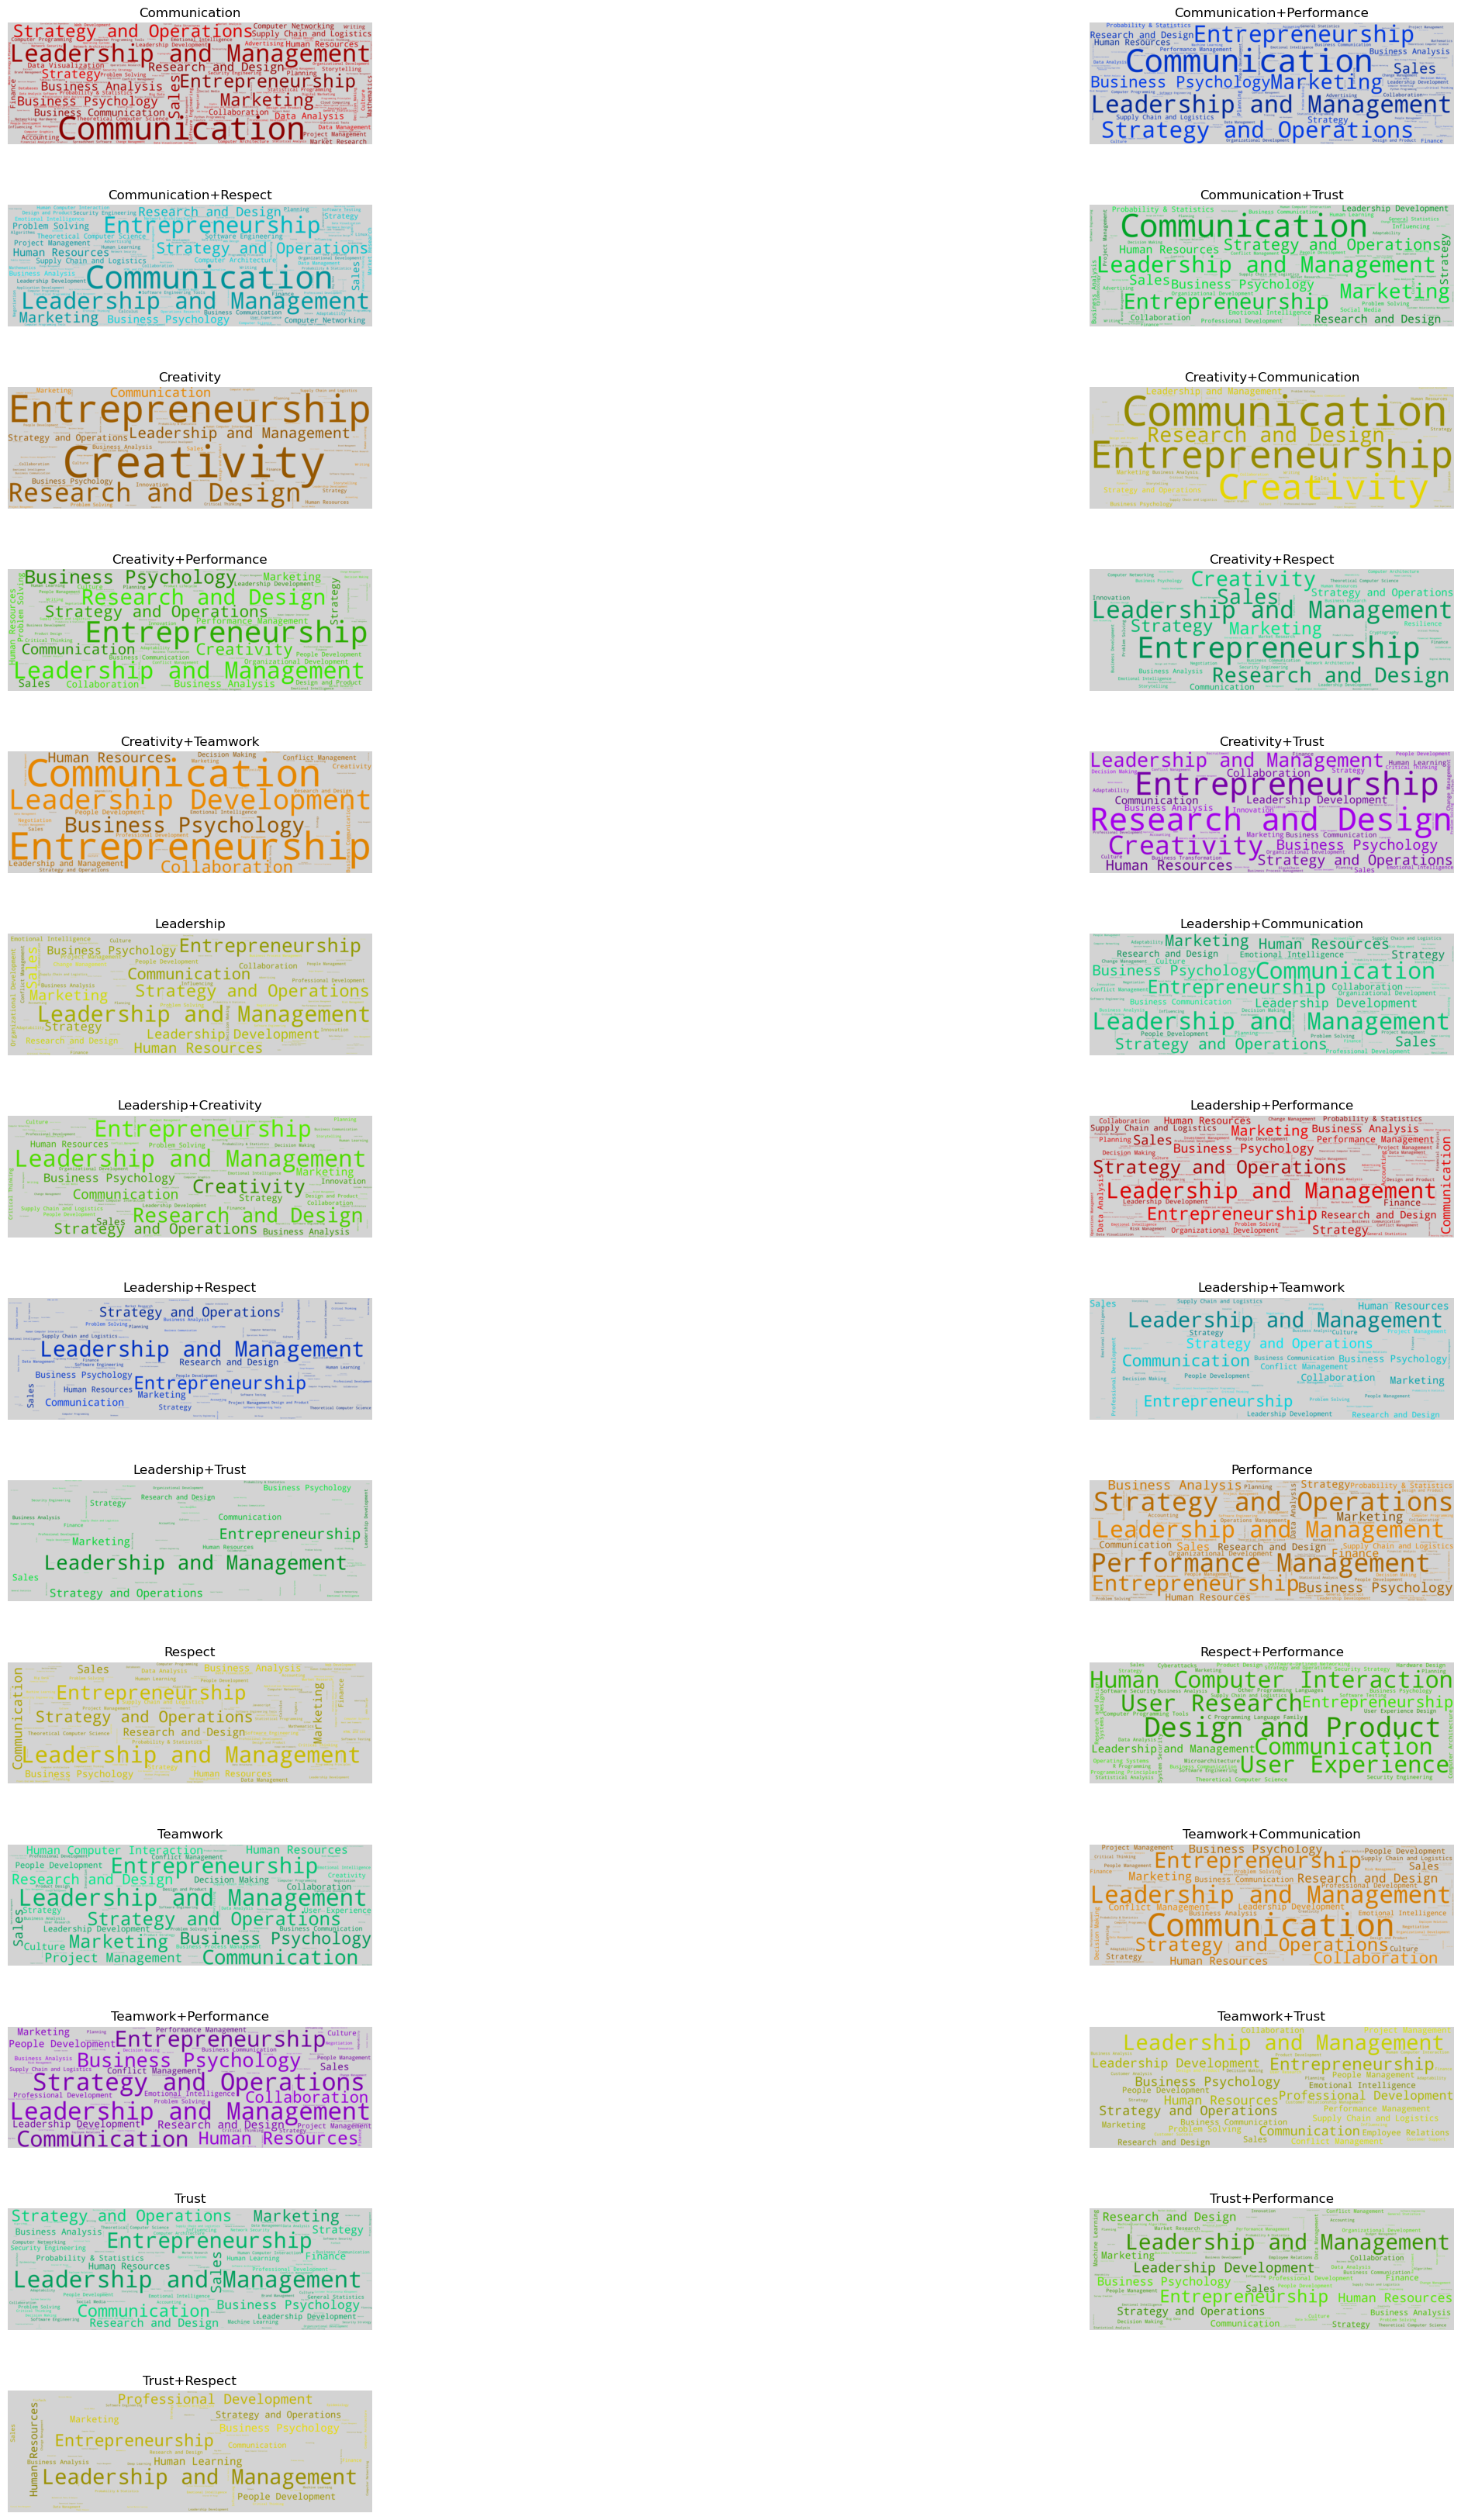

In [324]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from wordcloud import WordCloud

# Function to generate word cloud
color = [0, 160, 130, 95, 280, 40, 330, 110, 25, 200, 45, 110, 70, 0, 160, 130, 95, 280, 40, 330, 110, 25, 200, 45, 110, 70, 40]

def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def make_wordcloud(liste, increment, name, ax):
    words = dict()
    trunc_occurrences = liste[0:150]
    for s in trunc_occurrences:
        words[s[0]] = s[1]
    
    wordcloud = WordCloud(width=3000, height=1000, background_color='lightgrey', 
                          max_words=1628, relative_scaling=1,
                          color_func=random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis('off')
    ax.set_title(name)

fig = plt.figure(figsize=(30, 60))
gs = gridspec.GridSpec(20, 2, width_ratios=[2, 2], hspace=0.5, wspace=0.5)


# Loop through each metric and generate a word cloud
for index, row in grouped_data.iterrows():
    metric = row['metric(s)']
    competences = row['joined competences'].split(', ')
    
    # Process the competences for the word cloud
    occurrences = {}
    for competence in competences:
        occurrences[competence] = occurrences.get(competence, 0) + 1
    
    # Sort the competences by occurrences
    sorted_occurrences = sorted(occurrences.items(), key=lambda x: x[1], reverse=True)
    
    # Define the color of the words based on metric index
    tone = color[index]
    
    # Create a subplot using gridspec
    ax = plt.subplot(gs[index//2 , index%2])
    
    # Generate and display the word cloud
    make_wordcloud(sorted_occurrences, index + 1, metric, ax)

plt.tight_layout()
plt.show()


# MODEL TRAINING(BETA) :

In [306]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [270]:
# Create the initial DataFrame
grouped_data = pd.DataFrame(features)

# Join the acquired competences and create a new column 'joined competences'
grouped_data['joined competences'] = grouped_data['aquired competences'].apply(lambda lst: ' '.join(lst))

# Drop the 'aquired competences' column if needed
grouped_data = grouped_data.drop(columns=['aquired competences'])

# Print the resulting DataFrame
print(grouped_data)

          metric(s)                                 joined competences
0     Communication  Business Communication Business Psychology Com...
1     Communication  Communication Entrepreneurship Leadership and ...
2     Communication   Communication Employee Relations Human Resources
3     Communication  Probability & Statistics Bayesian Statistics G...
4     Communication  Data Management Databases Data Structures Big ...
...             ...                                                ...
1583  Trust+Respect  Leadership and Management Entrepreneurship Mar...
1584  Trust+Respect  Leadership and Management Business Psychology ...
1585  Trust+Respect  Change Management Leadership and Management St...
1586  Trust+Respect  Business Psychology Communication Entrepreneur...
1587  Trust+Respect  Communication Marketing Social Media Epidemiol...

[1588 rows x 2 columns]


In [271]:
grouped_data

metric(s)                                 joined competences
0     Communication  Business Communication Business Psychology Com...
1     Communication  Communication Entrepreneurship Leadership and ...
2     Communication   Communication Employee Relations Human Resources
3     Communication  Probability & Statistics Bayesian Statistics G...
4     Communication  Data Management Databases Data Structures Big ...
...             ...                                                ...
1583  Trust+Respect  Leadership and Management Entrepreneurship Mar...
1584  Trust+Respect  Leadership and Management Business Psychology ...
1585  Trust+Respect  Change Management Leadership and Management St...
1586  Trust+Respect  Business Psychology Communication Entrepreneur...
1587  Trust+Respect  Communication Marketing Social Media Epidemiol...

[1588 rows x 2 columns]

In [272]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [273]:
grouped_data["joined competences"] = grouped_data["joined competences"].apply(lambda x: preprocess(x))
grouped_data.sample(frac=1, random_state=42)

metric(s)  \
1079     Leadership+Teamwork   
405               Creativity   
1491                   Trust   
239      Communication+Trust   
610               Leadership   
...                      ...   
1130        Leadership+Trust   
1294                 Respect   
860   Leadership+Performance   
1459    Teamwork+Performance   
1126        Leadership+Trust   

                                     joined competences  
1079  leadership management entrepreneurship plannin...  
405   creativity entrepreneurship research design bu...  
1491  marketing communication social media digital m...  
239   communication storytelling writing software en...  
610   entrepreneurship leadership management mathema...  
...                                                 ...  
1130  entrepreneurship leadership management marketi...  
1294  business analysis general statistics probabili...  
860   creativity entrepreneurship business analysis ...  
1459  critical thinking research design strategy ope...  
1126  probability statistics leadership management s...  

[1588 rows x 2 columns]

In [275]:
train_data, test_data = train_test_split(grouped_data, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1270
Test Data size 318


In [276]:
train_data

metric(s)  \
359                 Creativity   
643                 Leadership   
1306                   Respect   
806      Leadership+Creativity   
344                 Creativity   
...                        ...   
211      Communication+Respect   
502   Creativity+Communication   
537         Creativity+Respect   
1220               Performance   
175      Communication+Respect   

                                     joined competences  
359   creativity innovation problem solving research...  
643   communication entrepreneurship influencing mar...  
1306  business psychology entrepreneurship human res...  
806   entrepreneurship research design innovation bu...  
344   research design accounting business design ent...  
...                                                 ...  
211   brand management marketing advertising busines...  
502   leadership management professional development...  
537   creativity entrepreneurship research design in...  
1220  business process management entrepreneurship l...  
175               communication writing research design  

[1270 rows x 2 columns]

In [277]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data["joined competences"])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 318


In [278]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data["joined competences"]),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data["joined competences"]),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1270, 30)
Testing X Shape: (318, 30)


In [279]:
labels = train_data["metric(s)"].unique().tolist()

In [280]:
encoder = LabelEncoder()
encoder.fit(train_data["metric(s)"].to_list())

y_train = encoder.transform(train_data["metric(s)"].to_list())
y_test = encoder.transform(test_data["metric(s)"].to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1270, 1)
y_test shape: (318, 1)


In [ ]:
import requests
import zipfile
import io

# Download the file using requests
url = "http://nlp.stanford.edu/data/glove.6B.zip"
response = requests.get(url)
with open("glove.6B.zip", "wb") as f:
    f.write(response.content)

# Unzip the downloaded file
with zipfile.ZipFile("glove.6B.zip", "r") as zip_ref:
    zip_ref.extractall("glove")


In [282]:
GLOVE_EMB = 'glove/glove.6B.300d.txt'

MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [283]:
embeddings_index = {}

with open(GLOVE_EMB, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [305]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\hamma\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)

In [293]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30
EMBEDDING_DIM = 300
LR = 4e-3
BATCH_SIZE = 2048
EPOCHS = 20

In [294]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [295]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [296]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [297]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [298]:

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [299]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [300]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/20
1/1 [==============================] - 7s 7s/step - loss: 0.9556 - accuracy: 0.0465 - val_loss: -23.4119 - val_accuracy: 0.0692 - lr: 0.0040
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: -24.5060 - accuracy: 0.0606 - val_loss: -99.6403 - val_accuracy: 0.0692 - lr: 0.0040
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: -102.2895 - accuracy: 0.0606 - val_loss: -276.3300 - val_accuracy: 0.0692 - lr: 0.0040
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: -281.8512 - accuracy: 0.0606 - val_loss: -639.3849 - val_accuracy: 0.0692 - lr: 0.0040
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: -648.0580 - accuracy: 0.0606 - val_loss: -1286.8756 - val_accuracy: 0.0692 - lr: 0.0040
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: -1302.2543 - accuracy: 0.0606 - val_loss: -2277.3342 - val_accuracy: 0.0692 - lr: 0.0040
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss

In [250]:
pr=processed_features.drop(['Trainer'], axis=1)

In [252]:
pr.sample(frac=1, random_state=42)

metric(s)  Account Management  Accounting  \
1079     Leadership+Teamwork                   0           0   
405               Creativity                   0           0   
1491                   Trust                   0           0   
239      Communication+Trust                   0           0   
610               Leadership                   0           1   
...                      ...                 ...         ...   
1130        Leadership+Trust                   0           0   
1294                 Respect                   0           0   
860   Leadership+Performance                   0           0   
1459    Teamwork+Performance                   0           0   
1126        Leadership+Trust                   0           0   

      Accounting Software  Accounts Payable and Receivable  Adaptability  \
1079                    0                                0             0   
405                     0                                0             0   
1491                    0                                0             0   
239                     0                                0             0   
610                     0                                0             0   
...                   ...                              ...           ...   
1130                    0                                0             0   
1294                    0                                0             0   
860                     0                                0             0   
1459                    0                                0             0   
1126                    0                                0             0   

      Advertising  Advertising Sales  Agile Software Development  Algebra  \
1079            0                  0                           0        0   
405             0                  0                           0        0   
1491            1                  0                           0        0   
239             0                  0                           0        0   
610             1                  0                           0        1   
...           ...                ...                         ...      ...   
1130            0                  0                           0        0   
1294            0                  0                           0        0   
860             0                  0                           0        0   
1459            0                  0                           0        0   
1126            0                  0                           0        0   

      Algorithms  Amazon Web Services  Android Development  Apache  \
1079           0                    0                    0       0   
405            0                    0                    0       0   
1491           0                    0                    0       0   
239            0                    0                    0       0   
610            0                    0                    0       0   
...          ...                  ...                  ...     ...   
1130           0                    0                    0       0   
1294           0                    0                    0       0   
860            0                    0                    0       0   
1459           0                    0                    0       0   
1126           0                    0                    0       0   

      Application Development  Applied Machine Learning  Applied Mathematics  \
1079                        0                         0                    0   
405                         0                         0                    0   
1491                        0                         0                    0   
239                         0                         0                    0   
610                         0                         0                    0   
...                       ...                       ...                  ...   
1130       

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming your pr DataFrame contains encoded competences and metrics
X = pr.drop(['metric(s)'], axis=1)  # Features
y = pr['metric(s)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an encoder for competences (assuming one-hot encoding)
encoder = OneHotEncoder(handle_unknown='ignore')  # Add handle_unknown parameter
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Initialize a RandomForestClassifier (you can choose other classifiers)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
print(classification_report(y_test, y_pred))


                           precision    recall  f1-score   support

            Communication       0.33      0.18      0.23        17
Communication+Performance       0.06      0.06      0.06        17
    Communication+Respect       0.08      0.10      0.09        10
      Communication+Trust       0.14      0.12      0.13        16
               Creativity       0.17      0.10      0.13        29
 Creativity+Communication       0.07      0.06      0.06        18
   Creativity+Performance       0.00      0.00      0.00         7
       Creativity+Respect       0.00      0.00      0.00         3
      Creativity+Teamwork       0.00      0.00      0.00         4
         Creativity+Trust       0.00      0.00      0.00         2
               Leadership       0.04      0.06      0.04        18
 Leadership+Communication       0.00      0.00      0.00        24
    Leadership+Creativity       0.00      0.00      0.00        19
   Leadership+Performance       0.00      0.00      0.00     

In [165]:
#bad results

In [169]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/126.5 kB ? eta -:--:--
     --------- ----------------------------- 30.7/126.5 kB 1.3 MB/s eta 0:00:01
     -------------------- ---------------- 71.7/126.5 kB 777.7 kB/s eta 0:00:01
     ---------------------------------- - 122.9/126.5 kB 901.1 kB/s eta 0:00:01
     ------------------------------------ 126.5/126.5 kB 824.9 kB/s eta 0:00:00
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3

   -------- ------------------------------- 55.9/276.6 MB 1.3 MB/s eta 0:02:53
   -------- ------------------------------- 56.0/276.6 MB 1.3 MB/s eta 0:02:53
   -------- ------------------------------- 56.0/276.6 MB 1.3 MB/s eta 0:02:53
   -------- ------------------------------- 56.0/276.6 MB 1.3 MB/s eta 0:02:55
   -------- ------------------------------- 56.1/276.6 MB 1.3 MB/s eta 0:02:54
   -------- ------------------------------- 56.1/276.6 MB 1.3 MB/s eta 0:02:54
   -------- ------------------------------- 56.2/276.6 MB 1.3 MB/s eta 0:02:55
   -------- ------------------------------- 56.2/276.6 MB 1.3 MB/s eta 0:02:55
   -------- ------------------------------- 56.3/276.6 MB 1.3 MB/s eta 0:02:54
   -------- ------------------------------- 56.3/276.6 MB 1.3 MB/s eta 0:02:54
   -------- ------------------------------- 56.4/276.6 MB 1.3 MB/s eta 0:02:54
   -------- ------------------------------- 56.4/276.6 MB 1.3 MB/s eta 0:02:54
   -------- ------------------------------- 56.5/276

In [173]:
# Tokenize and pad sequences for both training and testing data
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(X)
X_train = tokenizer.texts_to_sequences(X_train_text)
X_test = tokenizer.texts_to_sequences(X_test_text)
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [172]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
target_names = label_encoder.classes_

print(classification_report(y_test, y_pred_classes, labels=range(len(target_names)), target_names=target_names))


ValueError: in user code:

    File "C:\Users\hamma\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\hamma\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hamma\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\hamma\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\hamma\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\hamma\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 667), found shape=(None, 81)
